In [142]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import Workbook

In [143]:
#Loading the dataset
Crime_Statistics = pd.read_csv("./35100177.csv", dtype={'DGUID': str, 'TERMINATED': str}, low_memory=False)

In [144]:
#Displaying first five rows
Crime_Statistics.head(5)

,REF_DATE,GEO,DGUID,Violations,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1998,Canada,2021A000011124,"Total, all violations [0]",Actual incidents,Number,223,units,0,v44348247,1.1.1,2688540.00,NaN,NaN,NaN,0
1,1998,Canada,2021A000011124,"Total, all violations [0]","Rate per 100,000 population",Rate,257,units,0,v44396346,1.1.2,8915.12,NaN,NaN,NaN,2
2,1998,Canada,2021A000011124,"Total, all violations [0]",Percentage change in rate,Percent,239,units,0,v44391402,1.1.3,NaN,..,NaN,NaN,2
3,1998,Canada,2021A000011124,"Total, all violations [0]",Percentage contribution to the Crime Severity ...,Percent,239,units,0,v1545644596,1.1.17,100.00,NaN,NaN,NaN,2
4,1998,Canada,2021A000011124,"Total, all violations [0]",Unfounded incidents,Number,223,units,0,v1000149311,1.1.15,NaN,..,NaN,NaN,0


## 2. Understand the Dataset

In [145]:
#Checking the shape of the dataset
Crime_Statistics.shape

(7244910, 16)

The dataset includes 7244910 rows and 16 columns.

In [146]:
#Checking the columns of the dataset
Crime_Statistics.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Violations', 'Statistics', 'UOM', 'UOM_ID',
       'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS',
       'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

The names of the 16 columns are: 'REF_DATE', 'GEO', 'DGUID', 'Violations', 'Statistics', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED', and 'DECIMALS'.

In [147]:
#Getting more information of the dataset including missing data
Crime_Statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7244910 entries, 0 to 7244909
Data columns (total 16 columns):
 #   Column         Dtype  
---  ------         -----  
 0   REF_DATE       int64  
 1   GEO            object 
 2   DGUID          object 
 3   Violations     object 
 4   Statistics     object 
 5   UOM            object 
 6   UOM_ID         int64  
 7   SCALAR_FACTOR  object 
 8   SCALAR_ID      int64  
 9   VECTOR         object 
 10  COORDINATE     object 
 11  VALUE          float64
 12  STATUS         object 
 13  SYMBOL         float64
 14  TERMINATED     object 
 15  DECIMALS       int64  
dtypes: float64(2), int64(4), object(10)
memory usage: 884.4+ MB


The above data represents the data type of each columns.

## 3. Examine the unique values of each columns in the dataset and perform data cleaning if required

### Column #1: REF_DATE

In [148]:
#Checking unique values for "REF_DATE" column
Crime_Statistics['REF_DATE'].unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023], dtype=int64)

The "REF_DATE" column in the dataset represents the year in which the crime was committed. The dataset includes the information about the crime committed in the years 1998 to 2023.

In [149]:
#Renaming the column "REF_DATE" to "Year"
Crime_Statistics.rename(columns={'REF_DATE': 'Year'}, inplace=True)

### Column #2: GEO

In [150]:
#Checking unique values for "GEO" column
Crime_Statistics['GEO'].unique()

array(['Canada', 'Newfoundland and Labrador [10]',
       "St. John's, Newfoundland and Labrador [10001]",
       'Prince Edward Island [11]', 'Nova Scotia [12]',
       'Halifax, Nova Scotia [12205]', 'New Brunswick [13]',
       'Moncton, New Brunswick [13305]',
       'Saint John, New Brunswick [13310]', 'Quebec [24]',
       'Saguenay, Quebec [24408]', 'Québec, Quebec [24421]',
       'Sherbrooke, Quebec [24433]', 'Trois-Rivières, Quebec [24442]',
       'Montréal, Quebec [24462]', 'Ottawa-Gatineau, Quebec part [24505]',
       'Ontario [35]', 'Ottawa-Gatineau, Ontario/Quebec [24505/35505]',
       'Ottawa-Gatineau, Ontario part [35505]',
       'Kingston, Ontario [35521]',
       'Belleville-Quinte West, Ontario [35522]',
       'Peterborough, Ontario [35529]', 'Toronto, Ontario [35535]',
       'Hamilton, Ontario [35537]',
       'St. Catharines-Niagara, Ontario [35539]',
       'Kitchener-Cambridge-Waterloo, Ontario [35541]',
       'Brantford, Ontario [35543]', 'Guelph, Ontario

The "Geo" column in the dataset contains information about geographic location accross Canada, including provinces, cities, and specific areas within cities.

- Provinces: Alberta, British Columbia, Manitoba, New Brunswick, Newfoundland and Labrador, Nova Scotia, Northwest Territories, Nanavut, Ontario Quebec, Saskatchewan, and Yukon
- Cities and Regions: Halifax, Montreal, Ottawa, Calgary, Edmonton, Red Deer, Barrie, Kingston, Thunder Bay, Regina, Brantford, Kitchener, Winnipeg, Lethbridge, Windsor, and so on.
- Specific Areas within cities: Ottawa-Gatineau, St. Catharines-Niagara, Belleville-Quinte West, and so on.

### Column #3: DGUID

In [151]:
#Checking unique values for "DGUID" column
Crime_Statistics['DGUID'].unique()

array(['2021A000011124', '2021A000210', '2021A003510001', '2021A000211',
       '2021A000212', '2021A003512205', '2021A000213', '2021A003513305',
       '2021A003513310', '2021A000224', '2021A003524408',
       '2021A003524421', '2021A003524433', '2021A003524442',
       '2021A003524462', '2021A003524505', '2021A000235', '2021A0035505',
       '2021A003535505', '2021A003535521', '2021A003535522',
       '2021A003535529', '2021A003535535', '2021A003535537',
       '2021A003535539', '2021A003535541', '2021A003535543',
       '2021A003535550', '2021A003535555', '2021A003535559',
       '2021A003535568', '2021A003535580', '2021A003535595',
       '2021A000246', '2021A003546602', '2021A000247', '2021A003547705',
       '2021A003547725', '2021A000248', '2021A003548810',
       '2021A003548825', '2021A003548835', '2021A000259',
       '2021A003559915', '2021A003559932', '2021A003559933',
       '2021A003559935', '2021A000260', '2021A000261', '2021A000262', nan,
       '2021A003513320', '2021A

The "DGUID" column in the dataset represent unique identifiers for specific geographic areas or regions. Each value in the dataset, such as 2021A000011124 appears to be a code that maps to a specific location (like province, city, or region). However, the presence of "nan" in dataset indicates there are some missing data for some records. Since we already have this information in the 'GEO' column, it would be best to drop the 'DGUID' column."



In [152]:
#Removing the column "DGUID"
Crime_Statistics.drop(columns=['DGUID'], inplace=True)

### Column #4: Violations

In [153]:
#Checking unique values for "Violations" column
Crime_Statistics['Violations'].unique()

array(['Total, all violations [0]',
       'Total, all Criminal Code violations (including traffic) [25]',
       'Total, all Criminal Code violations (excluding traffic) [50]',
       'Total violent Criminal Code violations [100]', 'Homicide [110]',
       'Murder, first degree [1110]', 'Murder, second degree [1120]',
       'Manslaughter [1130]', 'Infanticide [1140]',
       'Total other violations causing death [120]',
       'Criminal negligence causing death [1150]',
       'Other related violations causing death [1160]',
       'Attempted murder [1210]',
       'Sexual offence which occurred prior to January 4, 1983 [1300]',
       'Sexual assault, level 3, aggravated [1310]',
       'Sexual assault, level 2, weapon or bodily harm [1320]',
       'Sexual assault, level 1 [1330]',
       'Total sexual violations against children [130]',
       'Sexual interference [1345]',
       'Invitation to sexual touching [1350]',
       'Sexual exploitation [1355]',
       'Making sexually e

The column "Violations" represent different types of criminal violations or offenses, ranging from broad categories like "Total, all violations" to specific offenses such as "Murder, first degree" or "Sexual assault, level 3, aggravated.

### Column #5: Statistics

In [154]:
#Checking unique values for "Statistics" column
Crime_Statistics['Statistics'].unique()

array(['Actual incidents', 'Rate per 100,000 population',
       'Percentage change in rate',
       'Percentage contribution to the Crime Severity Index (CSI)',
       'Unfounded incidents', 'Percent unfounded', 'Total cleared',
       'Cleared by charge', 'Cleared otherwise', 'Total, persons charged',
       'Rate, total persons charged per 100,000 population aged 12 years and over',
       'Total, adult charged',
       'Rate, adult charged per 100,000 population aged 18 years and over',
       'Total, youth charged',
       'Rate, youth charged per 100,000 population aged 12 to 17 years',
       'Total, youth not charged',
       'Rate, youth not charged per 100,000 population aged 12 to 17 years'],
      dtype=object)

The column "Statistics" represent various measures related to crime data, focusing on rates, percentages, and charges.
- Incidents: Measures of actual incidents of crime, such as "Actual incidents" and "Unfounded incidents".
- Rate per Population: Crime rates calculated per 100,000 population, such as "Rate per 100,000 population" and various rates for adults and youth.
- Percentage Change: Changes in crime rate over time, such as "Percentage change in rate".
- Crime Clearance: Information on how crimes are cleared, such as "Total cleared," "Cleared by charge," and "Cleared otherwise".
- Persons Charged: Metrics related to individuals charged with crimes, including "Total, persons charged" and rates for adults and youth.

### Column #6: UOM

In [155]:
#Checking unique values for "UOM" column
Crime_Statistics['UOM'].unique()

array(['Number', 'Rate', 'Percent'], dtype=object)

The column "UOM" suggest the dataset includes different types of measurements for crime statistics.
- Number likely represents the total count of incidents or crimes, such as total number of homicides, assaults, or other crime types.
- Rate likely represents a rate per 100,000 population or another demographic group (such as adults or youth). It could refer to how frequently a crime occurs in relation to the population size.
- Percent could refer to percentage values, showing the percentage change in crime rates over time or the percentage contribution of a particular crime type to the total Crime Severity Index (CSI).

### Column #7: UOM_ID

In [156]:
#Checking unique values for "UOM_ID" column
Crime_Statistics['UOM_ID'].unique()

array([223, 257, 239], dtype=int64)

The column "UOM_ID" represent identifier or code that correspond to different units of measurement (UOM) used in the dataset.

In [157]:
#Verifying the relationship between the values in the "UOM" column and "UOM_ID" column
print(Crime_Statistics[Crime_Statistics['UOM'] == 'Number']['UOM_ID'].unique())  # Check if it maps to 223
print(Crime_Statistics[Crime_Statistics['UOM'] == 'Rate']['UOM_ID'].unique())  # Check if it maps to 257
print(Crime_Statistics[Crime_Statistics['UOM'] == 'Percent']['UOM_ID'].unique())  # Check if it maps to 239

[223]
[257]
[239]


The output confirms that:

"Number" in the UOM column corresponds to 223 in the UOM_ID column.
"Rate" in the UOM column corresponds to 257 in the UOM_ID column.
"Percent" in the UOM column corresponds to 239 in the UOM_ID column.

Both the columns "UOM" and "UOM_ID" are mapping the same concepts, so proceeding further to drop the column.

In [158]:
#Removing the column "UOM_ID"
Crime_Statistics.drop(columns=['UOM_ID'], inplace=True)

### Column #8: SCALAR_FACTOR

In [159]:
#Checking unique values for "SCALAR_FACTOR" column
Crime_Statistics['SCALAR_FACTOR'].unique()

array(['units'], dtype=object)

The column "SCALAR_FACTOR" might indicate that the column represents measurements in units.

This column does not provide any additional information and does not add the value to the dataset, so it's best to drop the column.

In [160]:
#Removing the column "SCALAR_FACTOR"
Crime_Statistics.drop(columns=['SCALAR_FACTOR'], inplace=True)

### Column #9: SCALAR_ID

In [161]:
#Checking unique values for "SCALAR_ID" column
Crime_Statistics['SCALAR_ID'].unique()

array([0], dtype=int64)

The column "SCALAR_ID" might be an identifier or code that corresponds to a ype of measurement or factor that applies universally ("units").

This column does not provide any additional information and does not add the value to the dataset, so it's best to drop the column.

In [162]:
#Removing the column "SCALAR_ID"
Crime_Statistics.drop(columns=['SCALAR_ID'], inplace=True)

### Column #10: VECTOR

In [163]:
#Checking unique values for "VECTOR" column
Crime_Statistics['VECTOR'].unique()

array(['v44348247', 'v44396346', 'v44391402', ..., 'v1564070709',
       'v1564070710', 'v1564070711'], dtype=object)

The column "VECTOR" likely is the identifiers for specific events, categories, or data points. These IDs could be useful for tracking or linking specific data points to detailed records. It may also indicate different categories or events related to crime data, each with its own unique identifier.

### Column #11: COORDINATE

In [164]:
#Checking unique values for "COORDINATE" column
Crime_Statistics['COORDINATE'].unique()

array(['1.1.1', '1.1.2', '1.1.3', ..., '51.321.12', '51.321.13',
       '51.321.14'], dtype=object)

The "Coordinates" column appears to contain values like '1.1.1', '1.1.2', and '51.321.12', which seem to follow a structured format. These could be geographic coordinates or hierarchical codes that represent specific locations or areas where crimes occurred.

- Hierarchical Code: The format 'x.x.x' could indicate a hierarchical or categorized system, for instance, it could represent regions or zones in a geographic area.
- Geographic Coordinates: These could also represent specific locations, though typically, geographic coordinates would use latitude and longitude (45.4215, -75.6972), so this format seems less likely to be direct GPS coordinates.

### Column #12: VALUE

In [165]:
#Checking unique values for "VALUE" column
Crime_Statistics['VALUE'].unique()

array([2.68854e+06, 8.91512e+03,         nan, ..., 5.11160e+02,
       1.49485e+03, 2.36030e+02])

The column "VALUE" contains a range of numerical data, including very large values (such as 2.68854e+06), smaller values (such as 8.91512e+03), and NaN (missing values).
- Large Values are likely counts, totals, or other aggregated values. The scientific notation (e+06) represents values in the millions.
- Smaller Values might represent smaller counts or different units of measurement.
- NaN (Not a Number)represents missing or unavailable data for some records.

### Column #13: STATUS

In [166]:
#Checking unique values for "STATUS" column
Crime_Statistics['STATUS'].unique()

array([nan, '..', '0s'], dtype=object)

The column "STATUS" contains either missing value, or .. or 0s. The column seems irrelevant and does not add value to the dataset, so it's best to drop the column.

In [167]:
#Removing the column "STATUS"
Crime_Statistics.drop(columns=['STATUS'], inplace=True)

### Column #14: SYMBOL

In [168]:
#Checking unique values for "SYMBOL" column
Crime_Statistics['SYMBOL'].unique()

array([nan])

The column "SYMBOL" has no data, so dropping the column is the best option.

In [169]:
#Removing the column "SCALAR_ID"
Crime_Statistics.drop(columns=['SYMBOL'], inplace=True)

### Column #15: TERMINATED

In [170]:
#Checking unique values for "TERMINATED" column
Crime_Statistics['TERMINATED'].unique()

array([nan, 't'], dtype=object)

The column "TERMINATED" contains either missing value or "t" which likely stands for "termination" of some case, contract, or event. Missing value could possibly represent "non-termination of some case, contract or event".

This information could possibly provide important information in the analysis. Filling missing value with "No" and renaming "t" to "Yes" would be best approach for now.



In [171]:
#Filling missing value with "Not Terminated"
Crime_Statistics['TERMINATED'] = Crime_Statistics['TERMINATED'].fillna('No')

In [172]:
#Standardizing 't' to a more descriptive label as "Terminated"
Crime_Statistics['TERMINATED'] = Crime_Statistics['TERMINATED'].replace('t', 'Yes')

### Column #16: DECIMALS

In [173]:
#Checking unique values for "DECIMALS" column
Crime_Statistics['DECIMALS'].unique()

array([0, 2], dtype=int64)

The column "DECIMALS" represent number of decimal places used in the numerical data in another column. 
- 0: Numbers are presented as whole numbers.
- 2: Numbers are presented with two decimal places. 

This data is merely metadata and does not contribute much to the analysis, so dropping it would be the option.


In [174]:
#Removing the column "DECIMALS"
Crime_Statistics.drop(columns=['DECIMALS'], inplace=True)

## 4. Validate the dataset after the modification

In [175]:
#Displaying the first five rows after the modification
Crime_Statistics.head(5)

,Year,GEO,Violations,Statistics,UOM,VECTOR,COORDINATE,VALUE,TERMINATED
0,1998,Canada,"Total, all violations [0]",Actual incidents,Number,v44348247,1.1.1,2688540.00,No
1,1998,Canada,"Total, all violations [0]","Rate per 100,000 population",Rate,v44396346,1.1.2,8915.12,No
2,1998,Canada,"Total, all violations [0]",Percentage change in rate,Percent,v44391402,1.1.3,NaN,No
3,1998,Canada,"Total, all violations [0]",Percentage contribution to the Crime Severity ...,Percent,v1545644596,1.1.17,100.00,No
4,1998,Canada,"Total, all violations [0]",Unfounded incidents,Number,v1000149311,1.1.15,NaN,No


In [176]:
#Checking the shape of the dataset after the modification
Crime_Statistics.shape

(7244910, 9)

The new dataset after the modification contains the same number of rows, but the number of columns has been reduced from 16 to 9.

In [177]:
#Checking the columns of the dataset after the modification
Crime_Statistics.columns

Index(['Year', 'GEO', 'Violations', 'Statistics', 'UOM', 'VECTOR',
       'COORDINATE', 'VALUE', 'TERMINATED'],
      dtype='object')

The dataset contains the following columns: Year', 'GEO', 'Violations', 'Statistics', 'UOM', 'VECTOR', 'COORDINATE', 'VALUE', and 'TERMINATED'.

## 5. Check for Missing Values

In [178]:
#Checking for missing values
print(Crime_Statistics.isnull().sum())


Year                0
GEO                 0
Violations          0
Statistics          0
UOM                 0
VECTOR              0
COORDINATE          0
VALUE         2642420
TERMINATED          0
dtype: int64


The columns "VALUE" has 2642420 missing values respectively. If we drop those rows we will loose a substantial portion of the dataset.

Depending on the nature of data, we should impute these missing values.

## 6. Handle Missing Values

**Observations:**

*Number:*
- Extremely high maximum value (2699428) compared to other statistics (median is 0.00 and 75th percentile is 13.00).
- This indicates that most values are very small, with a few large outliers significantly skewing the mean (825.61).

*Percent:*
- Median (0.02) and 75th percentile (1.72) are relatively close to each other, suggesting a concentrated distribution of values.
- There are some negative values (minimum: -99.91) and a large maximum (18612.02), indicating possible outliers.

*Rate:*
- Median (0.00) and 75th percentile (3.24) suggest most rates are small, but the maximum (61383.25) shows the presence of large outliers.
- Mean (86.13) is significantly higher than the median, confirming skewness.



**Imputation Plan:**

*Number:*
- Use the median (0.00) for imputation within groups (e.g., Violations or GEO) because of the extreme skewness.
- Using the mean would introduce bias due to outliers.

*Percent:*
- The median (0.02) is a good choice for imputation, as it represents the central tendency better than the mean (7.11).

*Rate:*
- The median (0.00) is suitable for imputation to handle skewness.

In [179]:
#Applying the median value where 'VALUE' is missing
Crime_Statistics['VALUE'] = Crime_Statistics.apply(
    lambda row: 0 if pd.isnull(row['VALUE']) else row['VALUE'], axis=1)


In [180]:
#Checking for missing values after the modifications
print(Crime_Statistics.isnull().sum())

Year          0
GEO           0
Violations    0
Statistics    0
UOM           0
VECTOR        0
COORDINATE    0
VALUE         0
TERMINATED    0
dtype: int64


The missing value has been handled for now.

## 7. Check for Duplicates

In [181]:
#Checking for duplicates
print(f"Duplicates: {Crime_Statistics.duplicated().sum()}")

Duplicates: 0


There is no duplicates in the dataset.

## 8. Check for Inconsistent Data Types

In [182]:
#Checking the data types of all columns
print(Crime_Statistics.dtypes)

Year            int64
GEO            object
Violations     object
Statistics     object
UOM            object
VECTOR         object
COORDINATE     object
VALUE         float64
TERMINATED     object
dtype: object


All the data types for each columns makes sense. Looks great.

## 9. Handling Outliers if any

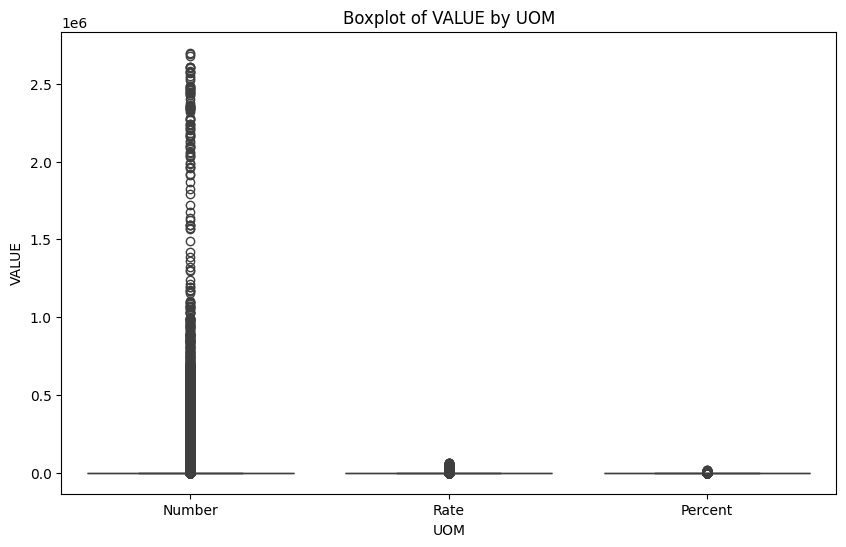

In [183]:
#Using boxplot to visualize data distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='UOM', y='VALUE', data=Crime_Statistics)
plt.title('Boxplot of VALUE by UOM')
plt.show()

- In the 'Number' category, there are several outliers at higher values indicating that there are some unusually large 'VALUE' data points associated with the 'Number' unit of measure.
- The 'Rate' category shows a wider spread of values but doesn't seem to have any significant outliers.
- The 'Percent' category has one clear outlier at a very high value, suggesting an unusual data point in this category.

In [184]:
import pandas as pd
import numpy as np

#Getting the 95th percentile threshold for 'Number' category
number_95th = Crime_Statistics[Crime_Statistics['UOM'] == 'Number']['VALUE'].quantile(0.95)

#Getting the 95th percentile threshold for 'Percent' category
percent_95th = Crime_Statistics[Crime_Statistics['UOM'] == 'Percent']['VALUE'].quantile(0.95)

#Getting the 95th percentile threshold for 'Rate' category
rate_95th = Crime_Statistics[Crime_Statistics['UOM'] == 'Rate']['VALUE'].quantile(0.95)

#Capping outliers for 'Number' category: Set VALUE to the 95th percentile if it exceeds the threshold
Crime_Statistics.loc[(Crime_Statistics['UOM'] == 'Number') & 
                     (Crime_Statistics['VALUE'] > number_95th), 'VALUE'] = number_95th

#Capping outliers for 'Percent' category: Set VALUE to the 95th percentile if it exceeds the threshold
Crime_Statistics.loc[(Crime_Statistics['UOM'] == 'Percent') & 
                     (Crime_Statistics['VALUE'] > percent_95th), 'VALUE'] = percent_95th

#Capping outliers for 'Rate' category: Set VALUE to the 95th percentile if it exceeds the threshold
Crime_Statistics.loc[(Crime_Statistics['UOM'] == 'Rate') & 
                     (Crime_Statistics['VALUE'] > percent_95th), 'VALUE'] = rate_95th

#Checking the capped values
Crime_Statistics.groupby('UOM')['VALUE'].describe()

,count,mean,std,min,25%,50%,75%,max
UOM,,,,,,,,
Number,3835710.0,33.905600,101.718141,0.00,0.0,0.0,2.0,426.00
Percent,1278090.0,-0.233645,6.417184,-99.91,0.0,0.0,0.0,10.26
Rate,2131110.0,16.423095,40.441918,0.00,0.0,0.0,0.5,118.73


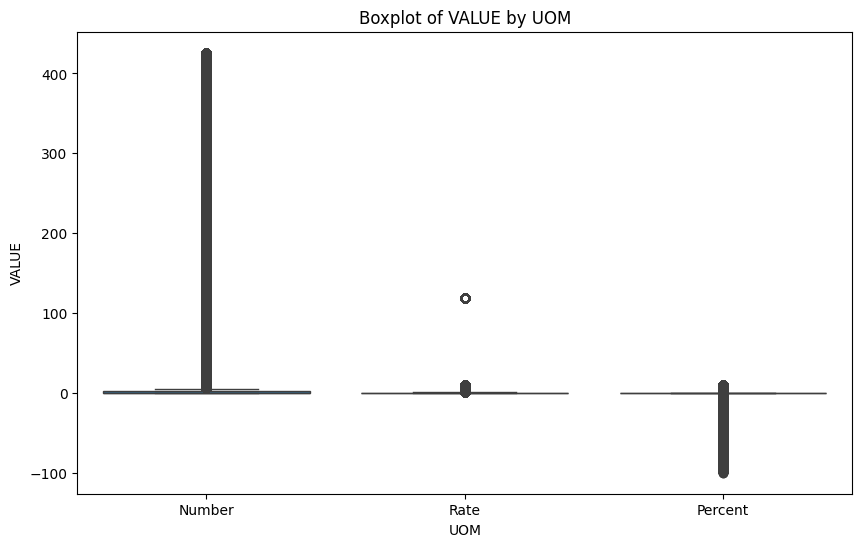

In [185]:
#Using boxplot to visualize data distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='UOM', y='VALUE', data=Crime_Statistics)
plt.title('Boxplot of VALUE by UOM')
plt.show()